In [24]:
import kagglehub
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns

In [25]:

# Download latest version
path = kagglehub.dataset_download("ahsan81/hotel-reservations-classification-dataset")

print("Path to dataset files:", path)
csv_file = os.path.join(path, 'Hotel Reservations.csv')
df = pd.read_csv(csv_file)
#Mapeo Booking_status
df['booking_status'] = df['booking_status'].map({'Canceled': 1, 'Not_Canceled': 0})
df.head()

Path to dataset files: C:\Users\samue\.cache\kagglehub\datasets\ahsan81\hotel-reservations-classification-dataset\versions\1


,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,INN00001,2,0,1,2,Meal Plan 1,0,Room_Type 1,224,2017,10,2,Offline,0,0,0,65.00,0,0
1,INN00002,2,0,2,3,Not Selected,0,Room_Type 1,5,2018,11,6,Online,0,0,0,106.68,1,0
2,INN00003,1,0,2,1,Meal Plan 1,0,Room_Type 1,1,2018,2,28,Online,0,0,0,60.00,0,1
3,INN00004,2,0,0,2,Meal Plan 1,0,Room_Type 1,211,2018,5,20,Online,0,0,0,100.00,0,1
4,INN00005,2,0,1,1,Not Selected,0,Room_Type 1,48,2018,4,11,Online,0,0,0,94.50,0,1


In [40]:
# Configuración visual
plt.style.use('ggplot')
sns.set_theme(style="whitegrid")
plt.rcParams['figure.figsize'] = (8, 5)


Porcentaje de reservas canceladas: 32.76%
Porcentaje de reservas no canceladas: 67.24%


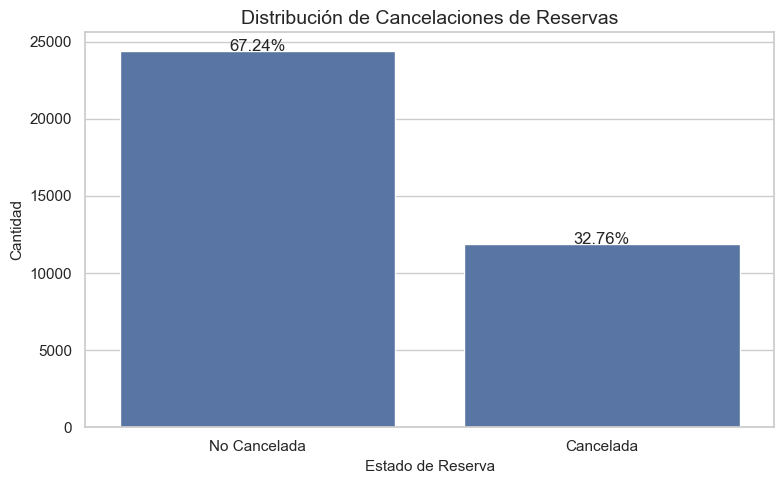

In [52]:
# Confirmando el desbalance en la variable objetivo
plt.figure(figsize=(8, 5))  # Reducido de (10, 6)
ax = sns.countplot(x='booking_status', data=df)
plt.title('Distribución de Cancelaciones de Reservas', fontsize=14)
plt.xlabel('Estado de Reserva', fontsize=11)
plt.ylabel('Cantidad', fontsize=11)
plt.xticks([0, 1], ['No Cancelada', 'Cancelada'])

# Añadir porcentajes sobre las barras
total = len(df)
for p in ax.patches:
    height = p.get_height()
    percentage = round((height / total) * 100, 2)
    ax.text(p.get_x() + p.get_width()/2., height + 30, f'{percentage}%', ha="center")

# Cuantificar el desbalance
canceled = df['booking_status'].mean() * 100
not_canceled = (1 - df['booking_status'].mean()) * 100
print(f"Porcentaje de reservas canceladas: {canceled:.2f}%")
print(f"Porcentaje de reservas no canceladas: {not_canceled:.2f}%")
plt.tight_layout()
plt.show()

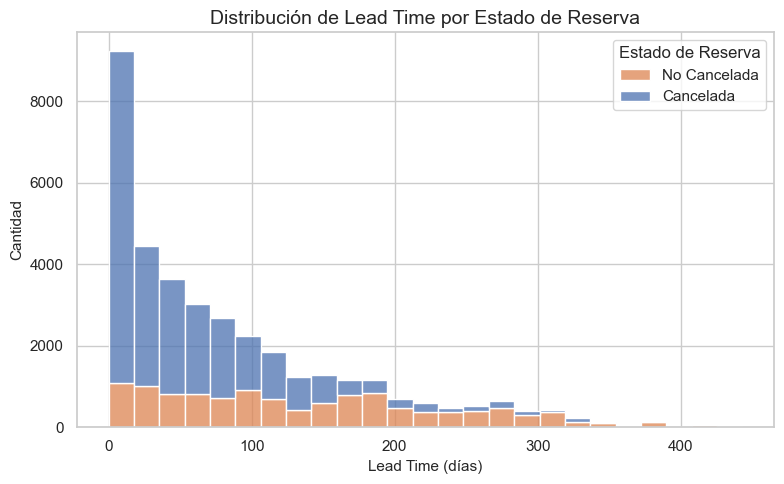

                  count        mean        std  min   25%    50%    75%    max
booking_status                                                                
0               24390.0   58.927224  64.028714  0.0  10.0   39.0   86.0  386.0
1               11885.0  139.215482  98.947731  0.0  55.0  122.0  205.0  443.0


In [53]:
# Análisis de lead_time (tiempo entre la reserva y la llegada)
plt.figure(figsize=(8, 5))  # Reducido de (12, 6)
sns.histplot(data=df, x='lead_time', hue='booking_status', multiple='stack', bins=25)
plt.title('Distribución de Lead Time por Estado de Reserva', fontsize=14)
plt.xlabel('Lead Time (días)', fontsize=11)
plt.ylabel('Cantidad', fontsize=11)
plt.legend(title='Estado de Reserva', labels=['No Cancelada', 'Cancelada'])
plt.tight_layout()
plt.show()

# Estadísticas de lead_time por estado de reserva
print(df.groupby('booking_status')['lead_time'].describe())

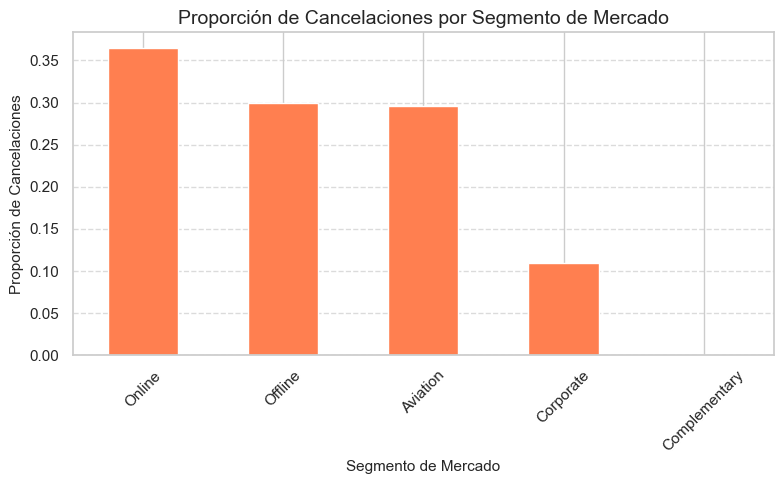

booking_status       No Cancelada  Cancelada  Total  % Cancelada
market_segment_type                                             
Online                      14739       8475  23214    36.508142
Offline                      7375       3153  10528    29.948708
Aviation                       88         37    125    29.600000
Corporate                    1797        220   2017    10.907288
Complementary                 391          0    391     0.000000


In [73]:
# Análisis del segmento de mercado
plt.figure(figsize=(8, 5))  # Reducido de (12, 6)
# Calcular las proporciones de cancelación por segmento de mercado
segment_cancel_prop = pd.crosstab(df['market_segment_type'], df['booking_status'], normalize='index')
segment_cancel_prop.rename(columns={0: 'No Cancelada', 1: 'Cancelada'}, inplace=True)

# Graficar
segment_cancel_prop['Cancelada'].sort_values(ascending=False).plot(kind='bar', color='coral')
plt.title('Proporción de Cancelaciones por Segmento de Mercado', fontsize=14)
plt.xlabel('Segmento de Mercado', fontsize=11)
plt.ylabel('Proporción de Cancelaciones', fontsize=11)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# Mostrar tabla con cantidades y porcentajes
segment_counts = pd.crosstab(df['market_segment_type'], df['booking_status'])
segment_counts.rename(columns={0: 'No Cancelada', 1: 'Cancelada'}, inplace=True)
segment_counts['Total'] = segment_counts.sum(axis=1)
segment_counts['% Cancelada'] = segment_counts['Cancelada'] / segment_counts['Total'] * 100
print(segment_counts.sort_values(by='% Cancelada', ascending=False))

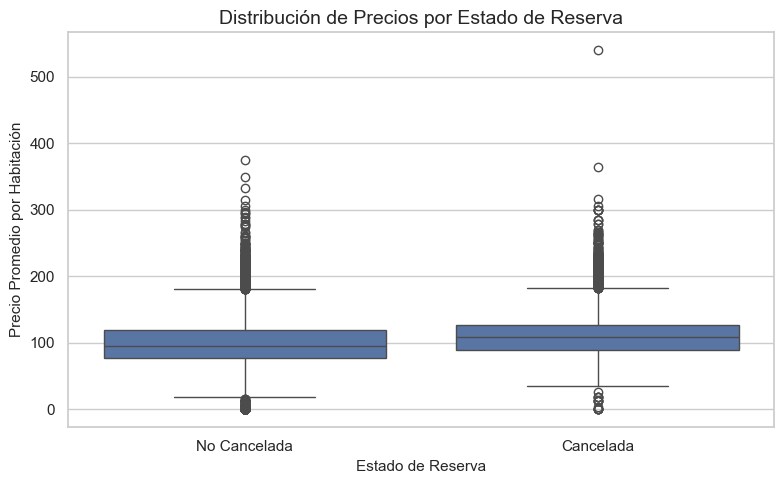

                  count        mean        std  min    25%    50%     75%  \
booking_status                                                              
0               24390.0   99.931412  35.872154  0.0  77.86   95.0  119.10   
1               11885.0  110.589966  32.264394  0.0  89.27  108.0  126.36   

                  max  
booking_status         
0               375.5  
1               540.0  


In [55]:
# Análisis de precios promedio por habitación
plt.figure(figsize=(8, 5))  # Reducido de (12, 6)
sns.boxplot(x='booking_status', y='avg_price_per_room', data=df)
plt.title('Distribución de Precios por Estado de Reserva', fontsize=14)
plt.xlabel('Estado de Reserva', fontsize=11)
plt.ylabel('Precio Promedio por Habitación', fontsize=11)
plt.xticks([0, 1], ['No Cancelada', 'Cancelada'])
plt.tight_layout()
plt.show()

# Estadísticas de precios por estado de reserva
print(df.groupby('booking_status')['avg_price_per_room'].describe())

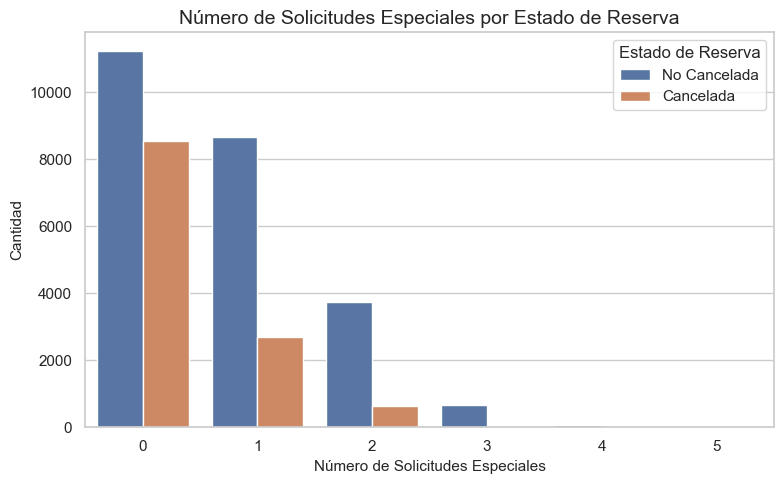

booking_status          No Cancelada  Cancelada
no_of_special_requests                         
0                           0.567932   0.432068
1                           0.762332   0.237668
2                           0.854033   0.145967
3                           1.000000   0.000000
4                           1.000000   0.000000
5                           1.000000   0.000000


In [56]:
# Análisis de solicitudes especiales
plt.figure(figsize=(8, 5))  # Reducido de (12, 6)
sns.countplot(x='no_of_special_requests', hue='booking_status', data=df)
plt.title('Número de Solicitudes Especiales por Estado de Reserva', fontsize=14)
plt.xlabel('Número de Solicitudes Especiales', fontsize=11)
plt.ylabel('Cantidad', fontsize=11)
plt.legend(title='Estado de Reserva', labels=['No Cancelada', 'Cancelada'])
plt.tight_layout()
plt.show()

# Calcular proporción de cancelaciones por número de solicitudes especiales
special_req_cancel = pd.crosstab(df['no_of_special_requests'], df['booking_status'], normalize='index')
special_req_cancel.rename(columns={0: 'No Cancelada', 1: 'Cancelada'}, inplace=True)
print(special_req_cancel)

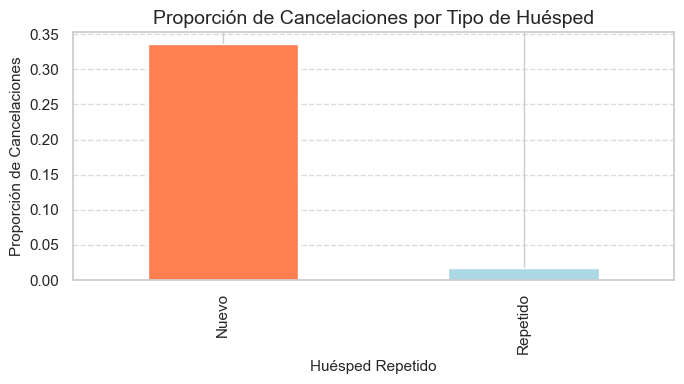

booking_status  No Cancelada  Cancelada  Total  % Cancelada
repeated_guest                                             
0                      23476      11869  35345    33.580422
1                        914         16    930     1.720430


In [59]:
# Análisis de huéspedes repetidos
plt.figure(figsize=(7, 4))  # Reducido de (10, 6)
repeat_guest_cancel = pd.crosstab(df['repeated_guest'], df['booking_status'], normalize='index')
repeat_guest_cancel.rename(columns={0: 'No Cancelada', 1: 'Cancelada'}, inplace=True)
repeat_guest_cancel['Cancelada'].plot(kind='bar', color=['coral', 'lightblue'])
plt.title('Proporción de Cancelaciones por Tipo de Huésped', fontsize=14)
plt.xlabel('Huésped Repetido', fontsize=11)
plt.ylabel('Proporción de Cancelaciones', fontsize=11)
plt.xticks([0, 1], ['Nuevo', 'Repetido'])
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# Mostrar tabla con cantidades
guest_counts = pd.crosstab(df['repeated_guest'], df['booking_status'])
guest_counts.rename(columns={0: 'No Cancelada', 1: 'Cancelada'}, inplace=True)
guest_counts['Total'] = guest_counts.sum(axis=1)
guest_counts['% Cancelada'] = guest_counts['Cancelada'] / guest_counts['Total'] * 100
print(guest_counts)

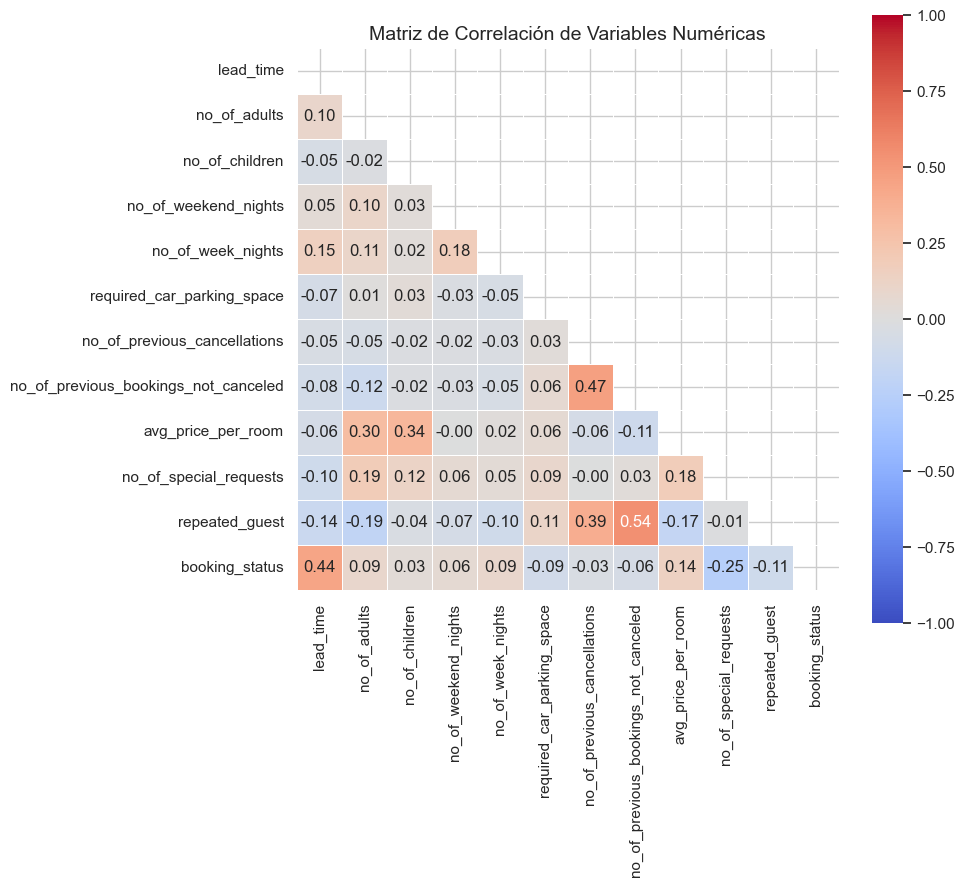

Correlaciones con booking_status (ordenadas):
booking_status                          1.000000
lead_time                               0.438538
avg_price_per_room                      0.142569
no_of_week_nights                       0.092996
no_of_adults                            0.086920
no_of_weekend_nights                    0.061563
no_of_children                          0.033078
no_of_previous_cancellations           -0.033728
no_of_previous_bookings_not_canceled   -0.060179
required_car_parking_space             -0.086185
repeated_guest                         -0.107287
no_of_special_requests                 -0.253070
Name: booking_status, dtype: float64


In [68]:
# Correlación entre variables numéricas
numeric_cols = ['lead_time', 'no_of_adults', 'no_of_children', 'no_of_weekend_nights', 
                'no_of_week_nights', 'required_car_parking_space', 'no_of_previous_cancellations', 
                'no_of_previous_bookings_not_canceled', 'avg_price_per_room', 
                'no_of_special_requests', 'repeated_guest', 'booking_status']

plt.figure(figsize=(10, 9))
corr_matrix = df[numeric_cols].corr()
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))
sns.heatmap(corr_matrix, mask=mask, annot=True, cmap='coolwarm', vmin=-1, vmax=1, 
            linewidths=0.5, fmt=".2f", square=True)
plt.title('Matriz de Correlación de Variables Numéricas', fontsize=14)
plt.tight_layout()
plt.show()

# Mostrar las correlaciones con la variable objetivo ordenadas
correlations_with_target = corr_matrix['booking_status'].sort_values(ascending=False)
print("Correlaciones con booking_status (ordenadas):")
print(correlations_with_target)

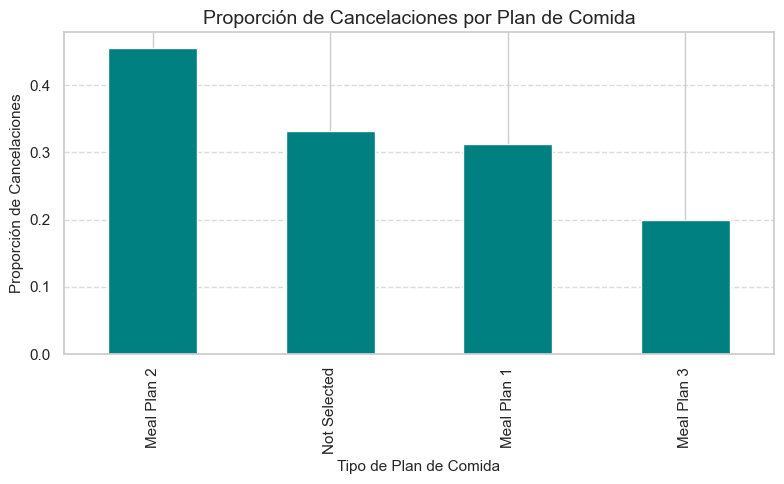

booking_status     No Cancelada  Cancelada  Total  % Cancelada
type_of_meal_plan                                             
Meal Plan 2                1799       1506   3305    45.567322
Not Selected               3431       1699   5130    33.118908
Meal Plan 1               19156       8679  27835    31.180169
Meal Plan 3                   4          1      5    20.000000


In [69]:
# Análisis de tipo de comida
plt.figure(figsize=(8, 5))  # Reducido de (12, 6)
meal_cancel_prop = pd.crosstab(df['type_of_meal_plan'], df['booking_status'], normalize='index')
meal_cancel_prop.rename(columns={0: 'No Cancelada', 1: 'Cancelada'}, inplace=True)
meal_cancel_prop['Cancelada'].sort_values(ascending=False).plot(kind='bar', color='teal')
plt.title('Proporción de Cancelaciones por Plan de Comida', fontsize=14)
plt.xlabel('Tipo de Plan de Comida', fontsize=11)
plt.ylabel('Proporción de Cancelaciones', fontsize=11)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# Mostrar tabla con cantidades
meal_counts = pd.crosstab(df['type_of_meal_plan'], df['booking_status'])
meal_counts.rename(columns={0: 'No Cancelada', 1: 'Cancelada'}, inplace=True)
meal_counts['Total'] = meal_counts.sum(axis=1)
meal_counts['% Cancelada'] = meal_counts['Cancelada'] / meal_counts['Total'] * 100
print(meal_counts.sort_values(by='% Cancelada', ascending=False))

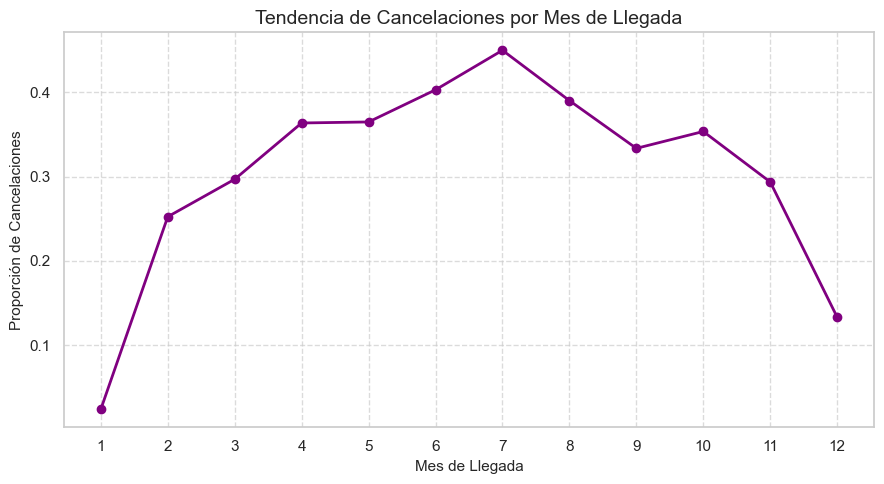

booking_status  No Cancelada  Cancelada  Total  % Cancelada
arrival_month                                              
7                       1606       1314   2920    45.000000
6                       1912       1291   3203    40.305963
8                       2325       1488   3813    39.024390
5                       1650        948   2598    36.489607
4                       1741        995   2736    36.366959
10                      3437       1880   5317    35.358285
9                       3073       1538   4611    33.355021
3                       1658        700   2358    29.686175
11                      2105        875   2980    29.362416
2                       1274        430   1704    25.234742
12                      2619        402   3021    13.306852
1                        990         24   1014     2.366864


In [70]:
# Análisis temporal: mes de llegada
plt.figure(figsize=(9, 5))  # Reducido de (14, 6)
month_cancel_prop = pd.crosstab(df['arrival_month'], df['booking_status'], normalize='index')
month_cancel_prop.rename(columns={0: 'No Cancelada', 1: 'Cancelada'}, inplace=True)
month_cancel_prop['Cancelada'].plot(kind='line', marker='o', color='purple', linewidth=2)
plt.title('Tendencia de Cancelaciones por Mes de Llegada', fontsize=14)
plt.xlabel('Mes de Llegada', fontsize=11)
plt.ylabel('Proporción de Cancelaciones', fontsize=11)
plt.xticks(range(1, 13))
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# Mostrar estadísticas por mes
month_stats = pd.crosstab(df['arrival_month'], df['booking_status'])
month_stats.rename(columns={0: 'No Cancelada', 1: 'Cancelada'}, inplace=True)
month_stats['Total'] = month_stats.sum(axis=1)
month_stats['% Cancelada'] = month_stats['Cancelada'] / month_stats['Total'] * 100
print(month_stats.sort_values(by='% Cancelada', ascending=False))

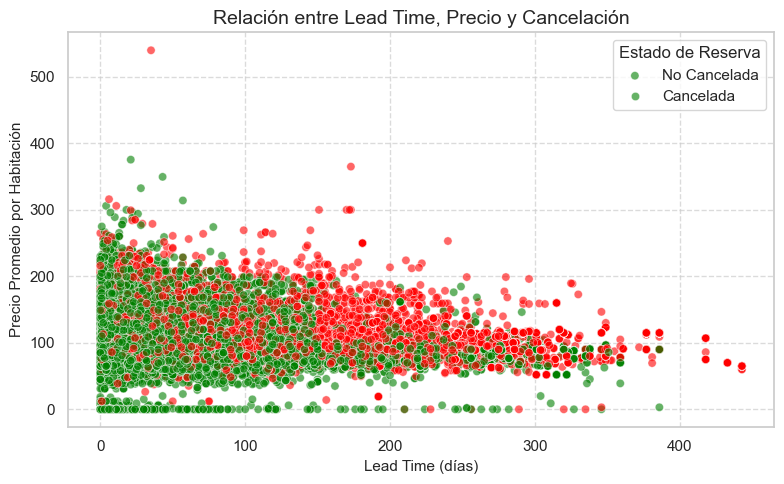

In [71]:
# Análisis multivariado: lead_time, precio y cancelación
plt.figure(figsize=(8, 5))  # Reducido de (12, 8)
sns.scatterplot(data=df, x='lead_time', y='avg_price_per_room', hue='booking_status', 
                alpha=0.6, palette=['green', 'red'])
plt.title('Relación entre Lead Time, Precio y Cancelación', fontsize=14)
plt.xlabel('Lead Time (días)', fontsize=11)
plt.ylabel('Precio Promedio por Habitación', fontsize=11)
plt.legend(title='Estado de Reserva', labels=['No Cancelada', 'Cancelada'])
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [72]:
# Resumen final del EDA
print("RESUMEN DEL ANÁLISIS EXPLORATORIO DE DATOS:")
print("-" * 50)

# Desbalance de clases
print(f"1. DESBALANCE DE CLASES:")
print(f"   - Reservas canceladas: {canceled:.2f}%")
print(f"   - Reservas no canceladas: {not_canceled:.2f}%")
print()

# Variables más correlacionadas con la cancelación
print(f"2. VARIABLES MÁS CORRELACIONADAS CON LA CANCELACIÓN:")
for var, corr in correlations_with_target.items():
    if var != 'booking_status' and abs(corr) >= 0.1:
        print(f"   - {var}: {corr:.4f}")
print()

# Hallazgos clave
print(f"3. HALLAZGOS CLAVE:")
print(f"   - El tiempo de anticipación (lead_time) muestra una relación positiva con la cancelación")
print(f"   - Los huéspedes repetidos tienen menor probabilidad de cancelar")
print(f"   - El número de solicitudes especiales está negativamente correlacionado con la cancelación")
print(f"   - Hay variaciones significativas en las tasas de cancelación por segmento de mercado")
print(f"   - Se observan patrones estacionales en las cancelaciones por mes de llegada")

RESUMEN DEL ANÁLISIS EXPLORATORIO DE DATOS:
--------------------------------------------------
1. DESBALANCE DE CLASES:
   - Reservas canceladas: 32.76%
   - Reservas no canceladas: 67.24%

2. VARIABLES MÁS CORRELACIONADAS CON LA CANCELACIÓN:
   - lead_time: 0.4385
   - avg_price_per_room: 0.1426
   - repeated_guest: -0.1073
   - no_of_special_requests: -0.2531

3. HALLAZGOS CLAVE:
   - El tiempo de anticipación (lead_time) muestra una relación positiva con la cancelación
   - Los huéspedes repetidos tienen menor probabilidad de cancelar
   - El número de solicitudes especiales está negativamente correlacionado con la cancelación
   - Hay variaciones significativas en las tasas de cancelación por segmento de mercado
   - Se observan patrones estacionales en las cancelaciones por mes de llegada
